# Liquid Water
The goal is to detect surface moisture or liquid water from image analysis.


In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_resH10 = pd.read_csv("../../data/timeseries_derived_data_products/MH10_resistivity_rock_2017.csv", parse_dates=['time'])
df_tempH10 = pd.read_csv("../../data/timeseries_derived_data_products/MH10_temperature_rock_2017.csv", parse_dates=['time'])
df_resH11 = pd.read_csv("../../data/timeseries_derived_data_products/MH11_resistivity_rock_2017.csv", parse_dates=['time'])
df_tempH11 = pd.read_csv("../../data/timeseries_derived_data_products/MH11_temperature_rock_2017.csv", parse_dates=['time'])
df_precip  = pd.read_csv("../../data/timeseries_derived_data_products/MH25_vaisalawxt520prec_2017.csv",  parse_dates=['time'])

In [127]:
df_resH10.set_index('time', inplace = True)
df_tempH10.set_index('time', inplace = True)
df_resH11.set_index('time', inplace = True)
df_tempH11.set_index('time', inplace = True)

In [128]:
df_resH10.head()

,position [],device_id [],resistivity_10cm [Mohm],resistivity_35cm [Mohm],resistivity_60cm [Mohm],resistivity_85cm [Mohm],resistivity_10_35cm [Mohm],resistivity_35_60cm [Mohm],resistivity_60_85cm [Mohm],resistivity_10_60cm [Mohm],resistivity_35_85cm [Mohm],resistivity_10_85cm [Mohm],ref1 [°C],ref2 [°C],ref3 [°C],ref4 [°C],ref5 [°C]
time,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00+00:00,10.0,2141.0,17.5556,43.1962,27.3694,2.5515,42.3615,40.5800,26.6627,24.3027,11.2267,7.0847,1.9563,-9.7372,1.0055,1.9538,-9.7387
2017-01-01 01:00:00+00:00,10.0,2141.0,17.3518,44.6352,27.2334,2.5086,42.4960,40.8015,26.5007,24.4067,11.3451,7.0938,1.9559,-9.7373,1.0055,1.9531,-9.7389
2017-01-01 02:00:00+00:00,10.0,2141.0,17.8145,46.1186,27.1687,2.4633,44.3185,41.0928,26.1960,24.5976,11.4621,7.1170,1.9557,-9.7378,1.0055,1.9531,-9.7386
2017-01-01 03:00:00+00:00,10.0,2141.0,18.6398,47.0515,27.1117,2.4222,46.1445,41.3910,25.8954,24.9310,11.5221,7.2701,1.9558,-9.7377,1.0054,1.9528,-9.7393
2017-01-01 04:00:00+00:00,10.0,2141.0,20.0013,47.4553,27.0140,2.3888,48.2208,41.5645,25.5277,25.4654,11.5436,7.5488,1.9556,-9.7378,1.0054,1.9531,-9.7394


In [129]:
df_tempH10.head()

,temperature_nearsurface_t2 [°C],device_id [],position [],ref1 [°C],ref2 [°C],ref3 [°C],ref4 [°C],ref5 [°C],temperature_10cm [°C],temperature_35cm [°C],temperature_60cm [°C],temperature_85cm [°C]
time,,,,,,,,,,,,
2017-01-01 00:00:00+00:00,-1.8219,2141.0,10.0,1.9563,-9.7372,1.0055,1.9538,-9.7387,-0.0335,1.4946,0.8955,-0.4628
2017-01-01 01:00:00+00:00,-2.2335,2141.0,10.0,1.9559,-9.7373,1.0055,1.9531,-9.7389,-0.4518,1.1538,0.8076,-0.4337
2017-01-01 02:00:00+00:00,-2.6047,2141.0,10.0,1.9557,-9.7378,1.0055,1.9531,-9.7386,-0.7957,0.8393,0.7098,-0.4143
2017-01-01 03:00:00+00:00,-2.9298,2141.0,10.0,1.9558,-9.7377,1.0054,1.9528,-9.7393,-1.1145,0.5453,0.6044,-0.4039
2017-01-01 04:00:00+00:00,-3.2746,2141.0,10.0,1.9556,-9.7378,1.0054,1.9531,-9.7394,-1.4527,0.2672,0.4918,-0.4016


In [130]:
df_resH11.head()

,position [],device_id [],resistivity_10cm [Mohm],resistivity_35cm [Mohm],resistivity_60cm [Mohm],resistivity_85cm [Mohm],resistivity_10_35cm [Mohm],resistivity_35_60cm [Mohm],resistivity_60_85cm [Mohm],resistivity_10_60cm [Mohm],resistivity_35_85cm [Mohm],resistivity_10_85cm [Mohm],ref1 [°C],ref2 [°C],ref3 [°C],ref4 [°C],ref5 [°C]
time,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00+00:00,11.0,2096.0,1599.0,962.1608,127.0015,7.8923,236.2396,27.6041,14.1885,1809.5477,277.4623,1860.5342,1.8808,-9.7943,1.0,1.8808,-9.7943
2017-01-01 01:00:00+00:00,11.0,2096.0,1599.0,965.4289,127.5495,7.8979,238.6480,27.6599,14.2005,1806.2707,280.4639,1862.2691,1.8808,-9.7944,1.0,1.8805,-9.7945
2017-01-01 02:00:00+00:00,11.0,2096.0,1599.0,968.6970,128.1990,7.9034,240.3905,27.7267,14.2107,1817.4124,282.5258,1881.3530,1.8809,-9.7942,1.0,1.8807,-9.7941
2017-01-01 03:00:00+00:00,11.0,2096.0,1599.0,977.8403,129.2797,7.9050,242.2904,27.7779,14.2212,1822.6555,284.6370,1876.1483,1.8813,-9.7939,1.0,1.8813,-9.7942
2017-01-01 04:00:00+00:00,11.0,2096.0,1599.0,982.1713,130.1579,7.9075,243.8829,27.8383,14.2247,1821.0171,286.5846,1877.8832,1.8813,-9.7939,1.0,1.8813,-9.7942


In [131]:
df_tempH11.head()

,temperature_nearsurface_t2 [°C],device_id [],position [],ref1 [°C],ref2 [°C],ref3 [°C],ref4 [°C],ref5 [°C],temperature_100cm [°C],temperature_10cm [°C],temperature_20cm [°C],temperature_30cm [°C],temperature_35cm [°C],temperature_50cm [°C],temperature_5cm [°C],temperature_60cm [°C],temperature_85cm [°C]
time,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00+00:00,-11.7525,2096.0,11.0,1.8808,-9.7943,1.0,1.8808,-9.7943,NaN,-11.3604,NaN,NaN,NaN,NaN,NaN,NaN,-7.2843
2017-01-01 01:00:00+00:00,-11.8453,2096.0,11.0,1.8808,-9.7944,1.0,1.8805,-9.7945,NaN,-11.5209,NaN,NaN,NaN,NaN,NaN,NaN,-7.2909
2017-01-01 02:00:00+00:00,-12.0100,2096.0,11.0,1.8809,-9.7942,1.0,1.8807,-9.7941,NaN,-11.6623,NaN,NaN,NaN,NaN,NaN,NaN,-7.2983
2017-01-01 03:00:00+00:00,-12.0953,2096.0,11.0,1.8813,-9.7939,1.0,1.8813,-9.7942,NaN,-11.8190,NaN,NaN,NaN,NaN,NaN,NaN,-7.3056
2017-01-01 04:00:00+00:00,-12.1044,2096.0,11.0,1.8813,-9.7939,1.0,1.8813,-9.7942,NaN,-11.8260,NaN,NaN,NaN,NaN,NaN,NaN,-7.3128


In [115]:
df_precip.set_index('time', inplace = True)
df_precip.head()

,position [],rain_accumulation [mm],rain_duration [s],rain_intensity [mm/h],rain_peak_intensity [mm/h],hail_accumulation [hits/cm^2],hail_duration [s],hail_intensity [hits cm^-2 h^-1],hail_peak_intensity [hits cm^-2 h^-1]
time,,,,,,,,,
2017-01-01 00:00:00+00:00,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 01:00:00+00:00,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 02:00:00+00:00,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 03:00:00+00:00,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 04:00:00+00:00,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
df_prec.describe()

,position [],rain_accumulation [mm],rain_duration [s],rain_intensity [mm/h],rain_peak_intensity [mm/h],hail_accumulation [hits/cm^2],hail_duration [s],hail_intensity [hits cm^-2 h^-1],hail_peak_intensity [hits cm^-2 h^-1]
count,8749.0,8760.000000,8.760000e+03,8526.000000,8526.000000,8760.000000,8760.000000,8526.000000,8526.000000
mean,25.0,692.565725,3.314555e+05,0.152168,35.886418,0.001176,10.175799,0.000038,0.027669
std,0.0,1489.824372,4.539226e+05,1.525485,72.193486,0.058405,91.760900,0.003163,0.279741
min,25.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.0,0.000000,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.0,10.905000,7.844500e+04,0.000000,4.500000,0.000000,0.000000,0.000000,0.000000
75%,25.0,397.420000,5.279725e+05,0.000000,32.800000,0.000000,0.000000,0.000000,0.000000
max,25.0,7212.810000,2.023750e+06,75.974200,319.400000,3.200000,1280.000000,0.290300,9.000000


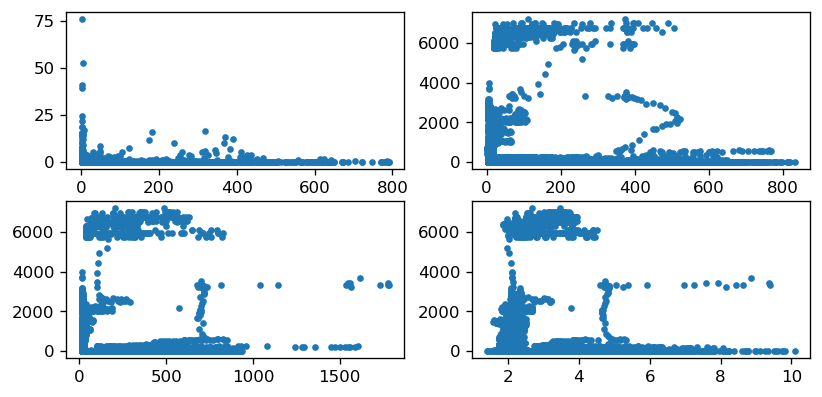

In [104]:
fig = plt.figure(num=None, figsize=(8, 8), dpi=120, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(4,2,1)
ax2 = fig.add_subplot(4,2,2)
ax3 = fig.add_subplot(4,2,3)
ax4 = fig.add_subplot(4,2,4)
ax1.plot(df_resH10['resistivity_10cm [Mohm]'], df_prec['rain_intensity [mm/h]'], '.')
ax2.plot(df_resH10['resistivity_35cm [Mohm]'], df_prec['rain_accumulation [mm]'], '.')
ax3.plot(df_resH10['resistivity_60cm [Mohm]'], df_prec['rain_accumulation [mm]'], '.')
ax4.plot(df_resH10['resistivity_85cm [Mohm]'], df_prec['rain_accumulation [mm]'], '.')

In [62]:
import plotly.express as px
iris = px.data.iris()
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

In [65]:
  fig = px.scatter_3d(x=df_resH10['resistivity_35cm [Mohm]'],
        y=df_precip['rain_duration [s]'],
        z=df_resH10.index)
fig.show()

<IPython.core.display.Javascript object>


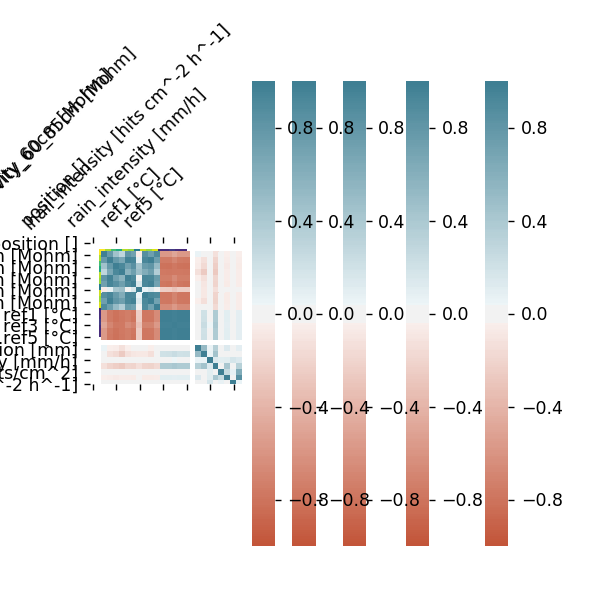

In [43]:
plt.matshow(df_resH10.corr())
plt.show()

In [67]:
df_comb = pd.concat([df_resH10, df_precip], 1)
df_comb.head()

,position [],device_id [],resistivity_10cm [Mohm],resistivity_35cm [Mohm],resistivity_60cm [Mohm],resistivity_85cm [Mohm],resistivity_10_35cm [Mohm],resistivity_35_60cm [Mohm],resistivity_60_85cm [Mohm],resistivity_10_60cm [Mohm],...,ref5 [°C],position [],rain_accumulation [mm],rain_duration [s],rain_intensity [mm/h],rain_peak_intensity [mm/h],hail_accumulation [hits/cm^2],hail_duration [s],hail_intensity [hits cm^-2 h^-1],hail_peak_intensity [hits cm^-2 h^-1]
time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00+00:00,10.0,2141.0,17.5556,43.1962,27.3694,2.5515,42.3615,40.5800,26.6627,24.3027,...,-9.7387,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 01:00:00+00:00,10.0,2141.0,17.3518,44.6352,27.2334,2.5086,42.4960,40.8015,26.5007,24.4067,...,-9.7389,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 02:00:00+00:00,10.0,2141.0,17.8145,46.1186,27.1687,2.4633,44.3185,41.0928,26.1960,24.5976,...,-9.7386,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 03:00:00+00:00,10.0,2141.0,18.6398,47.0515,27.1117,2.4222,46.1445,41.3910,25.8954,24.9310,...,-9.7393,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 04:00:00+00:00,10.0,2141.0,20.0013,47.4553,27.0140,2.3888,48.2208,41.5645,25.5277,25.4654,...,-9.7394,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
plt.matshow(df_comb.corr(), )


groups = df_comb.keys()

x_pos = np.arange(len(groups))
plt.xticks(x_pos,groups)

y_pos = np.arange(len(groups))
plt.yticks(y_pos,groups)

plt.show()

<Figure size 1440x1440 with 0 Axes>

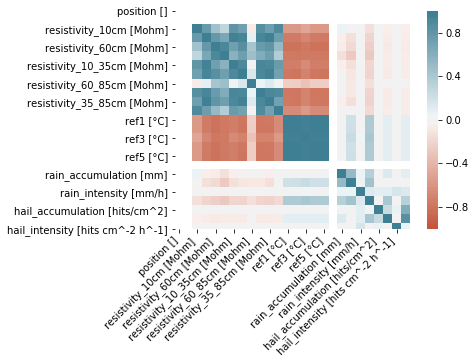

<Figure size 1440x1440 with 0 Axes>

In [103]:
corr = df_comb.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.figure(figsize=(20, 20))

In [281]:
%matplotlib inline

(2, 100)

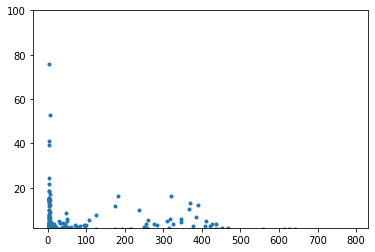

In [112]:
plt.plot(df_resH10['resistivity_10cm [Mohm]'], df_prec['rain_intensity [mm/h]'], '.')
plt.ylim([2,100])


In [141]:
df_tempRes1 = pd.concat([df_resH10, df_tempH10],1)
df_tempRes.head()

,position [],device_id [],resistivity_10cm [Mohm],resistivity_35cm [Mohm],resistivity_60cm [Mohm],resistivity_85cm [Mohm],resistivity_10_35cm [Mohm],resistivity_35_60cm [Mohm],resistivity_60_85cm [Mohm],resistivity_10_60cm [Mohm],...,ref5 [°C],temperature_100cm [°C],temperature_10cm [°C],temperature_20cm [°C],temperature_30cm [°C],temperature_35cm [°C],temperature_50cm [°C],temperature_5cm [°C],temperature_60cm [°C],temperature_85cm [°C]
time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00+00:00,10.0,2141.0,17.5556,43.1962,27.3694,2.5515,42.3615,40.5800,26.6627,24.3027,...,-9.7943,NaN,-11.3604,NaN,NaN,NaN,NaN,NaN,NaN,-7.2843
2017-01-01 01:00:00+00:00,10.0,2141.0,17.3518,44.6352,27.2334,2.5086,42.4960,40.8015,26.5007,24.4067,...,-9.7945,NaN,-11.5209,NaN,NaN,NaN,NaN,NaN,NaN,-7.2909
2017-01-01 02:00:00+00:00,10.0,2141.0,17.8145,46.1186,27.1687,2.4633,44.3185,41.0928,26.1960,24.5976,...,-9.7941,NaN,-11.6623,NaN,NaN,NaN,NaN,NaN,NaN,-7.2983
2017-01-01 03:00:00+00:00,10.0,2141.0,18.6398,47.0515,27.1117,2.4222,46.1445,41.3910,25.8954,24.9310,...,-9.7942,NaN,-11.8190,NaN,NaN,NaN,NaN,NaN,NaN,-7.3056
2017-01-01 04:00:00+00:00,10.0,2141.0,20.0013,47.4553,27.0140,2.3888,48.2208,41.5645,25.5277,25.4654,...,-9.7942,NaN,-11.8260,NaN,NaN,NaN,NaN,NaN,NaN,-7.3128


In [142]:
df_tempRes2 = pd.concat([df_resH11, df_tempH11],1)
df_tempRes2.head()

,position [],device_id [],resistivity_10cm [Mohm],resistivity_35cm [Mohm],resistivity_60cm [Mohm],resistivity_85cm [Mohm],resistivity_10_35cm [Mohm],resistivity_35_60cm [Mohm],resistivity_60_85cm [Mohm],resistivity_10_60cm [Mohm],...,ref5 [°C],temperature_100cm [°C],temperature_10cm [°C],temperature_20cm [°C],temperature_30cm [°C],temperature_35cm [°C],temperature_50cm [°C],temperature_5cm [°C],temperature_60cm [°C],temperature_85cm [°C]
time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00+00:00,11.0,2096.0,1599.0,962.1608,127.0015,7.8923,236.2396,27.6041,14.1885,1809.5477,...,-9.7943,NaN,-11.3604,NaN,NaN,NaN,NaN,NaN,NaN,-7.2843
2017-01-01 01:00:00+00:00,11.0,2096.0,1599.0,965.4289,127.5495,7.8979,238.6480,27.6599,14.2005,1806.2707,...,-9.7945,NaN,-11.5209,NaN,NaN,NaN,NaN,NaN,NaN,-7.2909
2017-01-01 02:00:00+00:00,11.0,2096.0,1599.0,968.6970,128.1990,7.9034,240.3905,27.7267,14.2107,1817.4124,...,-9.7941,NaN,-11.6623,NaN,NaN,NaN,NaN,NaN,NaN,-7.2983
2017-01-01 03:00:00+00:00,11.0,2096.0,1599.0,977.8403,129.2797,7.9050,242.2904,27.7779,14.2212,1822.6555,...,-9.7942,NaN,-11.8190,NaN,NaN,NaN,NaN,NaN,NaN,-7.3056
2017-01-01 04:00:00+00:00,11.0,2096.0,1599.0,982.1713,130.1579,7.9075,243.8829,27.8383,14.2247,1821.0171,...,-9.7942,NaN,-11.8260,NaN,NaN,NaN,NaN,NaN,NaN,-7.3128


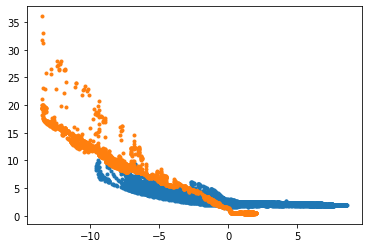

In [166]:
plt.plot(df_tempRes1['temperature_85cm [°C]'], df_tempRes1['resistivity_85cm [Mohm]'], '.')
plt.plot(df_tempRes2['temperature_85cm [°C]'], df_tempRes2['resistivity_85cm [Mohm]'],'.')

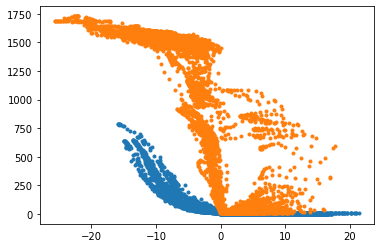

In [167]:
plt.plot(df_tempRes1['temperature_10cm [°C]'], df_tempRes1['resistivity_10cm [Mohm]'], '.')
plt.plot(df_tempRes2['temperature_10cm [°C]'], df_tempRes2['resistivity_10cm [Mohm]'],'.')

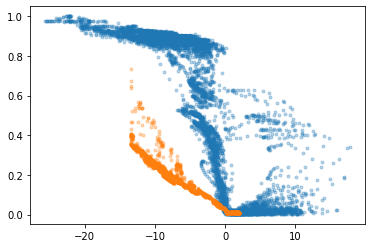

In [164]:
plt.plot(df_tempRes2['temperature_10cm [°C]'], df_tempRes2['resistivity_10cm [Mohm]']/max(df_tempRes2['resistivity_10cm [Mohm]'],),'.', alpha=0.3)
plt.plot(df_tempRes2['temperature_85cm [°C]'], df_tempRes2['resistivity_85cm [Mohm]']/max(df_tempRes2['resistivity_85cm [Mohm]']),'.', alpha=0.3)

In [169]:
for y in range(2009,2019,1):
    print(y)
    

2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


In [344]:
df_MH10_resi = pd.read_csv("../../data/ts_data_all/MH10_resistivity_rock_2008.csv", parse_dates=['time'])
df_MH10_resi.set_index('time', inplace = True)
#df_MH10_resi['Year'] = pd.to_datetime(df_MH10_resi.index).year
#df_MH10_resi['Year'] = df_MH10_resi['Year'].astype('category')


for y in range(2009,2018,1):
    df = pd.read_csv("../../data/ts_data_all/MH10_resistivity_rock_{}.csv".format(y), parse_dates=['time'])
    df.set_index('time', inplace = True)
    #df['Year'] = pd.to_datetime(df.index).year
    #df['Year'] = df['Year'].astype('category')
    df_MH10_resi = pd.concat([df_MH10_resi, df],0)

#df_MH10_resi['Year'] = pd.to_datetime(df_MH10_resi.index).year
df_MH10_resi.head()

,position [],device_id [],resistivity_10cm [Mohm],resistivity_35cm [Mohm],resistivity_60cm [Mohm],resistivity_85cm [Mohm],resistivity_10_35cm [Mohm],resistivity_35_60cm [Mohm],resistivity_60_85cm [Mohm],resistivity_10_60cm [Mohm],resistivity_35_85cm [Mohm],resistivity_10_85cm [Mohm],ref1 [°C],ref2 [°C],ref3 [°C],ref4 [°C],ref5 [°C]
time,,,,,,,,,,,,,,,,,
2008-07-24 22:00:00+00:00,10.0,2030.0,1.5747,2.9912,12.4520,1.6013,2.9683,9.9773,5.6974,6.2691,3.9925,3.6960,1.9987,-9.6989,1.005,1.9979,-9.7004
2008-07-24 23:00:00+00:00,10.0,2030.0,1.6446,3.0908,12.5569,1.5893,3.0637,10.3444,5.7612,6.4236,3.9902,3.7133,1.9984,-9.6995,1.005,1.9970,-9.7005
2008-07-25 00:00:00+00:00,10.0,2030.0,1.7161,3.1895,12.6688,1.5791,3.1604,10.7313,5.8146,6.5590,3.9902,3.7330,1.9991,-9.6996,1.005,1.9978,-9.6999
2008-07-25 01:00:00+00:00,10.0,2030.0,1.8099,3.2785,12.7202,1.5670,3.2660,11.0818,5.8513,6.7028,3.9827,3.7657,1.9986,-9.6988,1.005,1.9970,-9.7001
2008-07-25 02:00:00+00:00,10.0,2030.0,1.9032,3.3623,12.7988,1.5555,3.3508,11.4482,5.8825,6.8649,3.9751,3.8162,1.9988,-9.7001,1.005,1.9972,-9.7004


In [340]:
#print(pd.to_datetime(df_MH10_resi.index))

In [345]:
df_MH10_temp = pd.read_csv("../../data/ts_data_all/MH10_temperature_rock_2008.csv", parse_dates=['time'])
df_MH10_temp.set_index('time', inplace = True)
#df_MH10_temp['Year'] = pd.to_datetime(df_MH10_temp.index).year
#df_MH10_temp['Year'] = df_MH10_temp['Year'].astype('category')

for y in range(2009,2018,1):
    df = pd.read_csv("../../data/ts_data_all/MH10_temperature_rock_{}.csv".format(y), parse_dates=['time'])
    df.set_index('time', inplace = True)
    #df['Year'] = pd.to_datetime(df.index).year
    #df['Year'] = df['Year'].astype('category')
    df_MH10_temp = pd.concat([df_MH10_temp, df],0)

df_MH10_temp.tail()

,temperature_nearsurface_t2 [°C],device_id [],position [],ref1 [°C],ref2 [°C],ref3 [°C],ref4 [°C],ref5 [°C],temperature_10cm [°C],temperature_35cm [°C],temperature_60cm [°C],temperature_85cm [°C]
time,,,,,,,,,,,,
2017-12-31 19:00:00+00:00,-1.8630,2141.0,10.0,1.9470,-9.7492,1.004,1.9436,-9.7509,-0.7422,-1.6437,-4.2926,-5.9083
2017-12-31 20:00:00+00:00,-2.6166,2141.0,10.0,1.9478,-9.7484,1.004,1.9440,-9.7503,-1.3058,-1.8548,-4.1516,-5.7555
2017-12-31 21:00:00+00:00,-3.3009,2141.0,10.0,1.9483,-9.7484,1.004,1.9446,-9.7495,-1.8643,-2.0816,-4.0516,-5.6169
2017-12-31 22:00:00+00:00,-3.8324,2141.0,10.0,1.9479,-9.7482,1.004,1.9443,-9.7498,-2.3962,-2.3420,-3.9848,-5.4929
2017-12-31 23:00:00+00:00,-4.4265,2141.0,10.0,1.9476,-9.7486,1.004,1.9439,-9.7500,-2.9045,-2.6282,-3.9463,-5.3815


In [346]:
df_MH10 = pd.concat([df_MH10_resi, df_MH10_temp],1)
#df_MH10['Year'] = df_MH10['Year'].astype('category')
df_MH10['Group'] = "MH10"
df_MH10['Year'] = pd.to_datetime(df_MH10.index).year
df_MH10.to_csv("../../data/MH10.csv")
#df_MH10.describe()
#print(df_MH10['Group'])

In [347]:
df_MH11_resi = pd.read_csv("../../data/ts_data_all/MH11_resistivity_rock_2008.csv", parse_dates=['time'])
df_MH11_resi.set_index('time', inplace = True)

for y in range(2009,2018,1):
    df = pd.read_csv("../../data/ts_data_all/MH11_resistivity_rock_{}.csv".format(y), parse_dates=['time'])
    df.set_index('time', inplace = True)
    df_MH11_resi = pd.concat([df_MH11_resi, df],0)

df_MH11_resi.head()

,position [],device_id [],resistivity_10cm [Mohm],resistivity_35cm [Mohm],resistivity_60cm [Mohm],resistivity_85cm [Mohm],resistivity_10_35cm [Mohm],resistivity_35_60cm [Mohm],resistivity_60_85cm [Mohm],resistivity_10_60cm [Mohm],resistivity_35_85cm [Mohm],resistivity_10_85cm [Mohm],ref1 [°C],ref2 [°C],ref3 [°C],ref4 [°C],ref5 [°C]
time,,,,,,,,,,,,,,,,,
2008-07-24 22:00:00+00:00,11.0,2029.0,17.6772,13.3218,9.7147,2.5735,9.1887,7.4135,6.5402,15.5923,7.1908,7.9698,1.9042,-9.7705,1.0006,1.9023,-9.7713
2008-07-24 23:00:00+00:00,11.0,2029.0,18.1649,13.9626,9.6512,2.5802,9.5574,7.3945,6.5523,15.8051,7.4869,8.1331,1.9044,-9.7704,1.0005,1.9023,-9.7714
2008-07-25 00:00:00+00:00,11.0,2029.0,18.4018,14.3227,9.6234,2.5939,9.6634,7.3856,6.5790,16.0112,7.6028,8.3024,1.9041,-9.7709,1.0005,1.9022,-9.7720
2008-07-25 01:00:00+00:00,11.0,2029.0,18.3687,15.2196,9.7047,2.6077,9.8487,7.4146,6.6400,16.2226,7.7875,8.4303,1.9046,-9.7704,1.0006,1.9027,-9.7715
2008-07-25 02:00:00+00:00,11.0,2029.0,18.5370,16.8247,9.7505,2.6042,10.3273,7.3973,6.6651,16.4630,8.1982,8.5455,1.9046,-9.7704,1.0006,1.9027,-9.7716


In [348]:
df_MH11_temp = pd.read_csv("../../data/ts_data_all/MH11_temperature_rock_2008.csv", parse_dates=['time'])
df_MH11_temp.set_index('time', inplace = True)

for y in range(2009,2018,1):
    df = pd.read_csv("../../data/ts_data_all/MH11_temperature_rock_{}.csv".format(y), parse_dates=['time'])
    df.set_index('time', inplace = True)
    df_MH11_temp = pd.concat([df_MH11_temp, df],0)
    
df_MH11_temp.tail()

,temperature_nearsurface_t2 [°C],device_id [],position [],ref1 [°C],ref2 [°C],ref3 [°C],ref4 [°C],ref5 [°C],temperature_100cm [°C],temperature_10cm [°C],temperature_20cm [°C],temperature_30cm [°C],temperature_35cm [°C],temperature_50cm [°C],temperature_5cm [°C],temperature_60cm [°C],temperature_85cm [°C]
time,,,,,,,,,,,,,,,,,
2017-12-31 19:00:00+00:00,-6.8033,2096.0,11.0,1.8786,-9.7978,1.0,1.8807,-9.7969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 20:00:00+00:00,-7.2406,2096.0,11.0,1.8787,-9.7977,1.0,1.8807,-9.7968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 21:00:00+00:00,-7.5640,2096.0,11.0,1.8784,-9.7978,1.0,1.8801,-9.7967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 22:00:00+00:00,-8.0202,2096.0,11.0,1.8787,-9.7976,1.0,1.8805,-9.7969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 23:00:00+00:00,-8.5902,2096.0,11.0,1.8786,-9.7973,1.0,1.8804,-9.7970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [349]:
df_MH11 = pd.concat([df_MH11_resi, df_MH11_temp],1)
df_MH11['Group'] = "MH11"
df_MH11['Year'] = pd.to_datetime(df_MH11.index).year
df_MH11.to_csv("../../data/MH11.csv")
#df_MH11.describe()

In [327]:
df_MH11.keys()

Index(['position []', 'device_id []', 'resistivity_10cm [Mohm]',
       'resistivity_35cm [Mohm]', 'resistivity_60cm [Mohm]',
       'resistivity_85cm [Mohm]', 'resistivity_10_35cm [Mohm]',
       'resistivity_35_60cm [Mohm]', 'resistivity_60_85cm [Mohm]',
       'resistivity_10_60cm [Mohm]', 'resistivity_35_85cm [Mohm]',
       'resistivity_10_85cm [Mohm]', 'ref1 [°C]', 'ref2 [°C]', 'ref3 [°C]',
       'ref4 [°C]', 'ref5 [°C]', 'temperature_nearsurface_t2 [°C]',
       'device_id []', 'position []', 'ref1 [°C]', 'ref2 [°C]', 'ref3 [°C]',
       'ref4 [°C]', 'ref5 [°C]', 'temperature_100cm [°C]',
       'temperature_10cm [°C]', 'temperature_20cm [°C]',
       'temperature_30cm [°C]', 'temperature_35cm [°C]',
       'temperature_50cm [°C]', 'temperature_5cm [°C]',
       'temperature_60cm [°C]', 'temperature_85cm [°C]', 'Group'],
      dtype='object')

In [328]:
df_MH10.keys()

Index(['position []', 'device_id []', 'resistivity_10cm [Mohm]',
       'resistivity_35cm [Mohm]', 'resistivity_60cm [Mohm]',
       'resistivity_85cm [Mohm]', 'resistivity_10_35cm [Mohm]',
       'resistivity_35_60cm [Mohm]', 'resistivity_60_85cm [Mohm]',
       'resistivity_10_60cm [Mohm]', 'resistivity_35_85cm [Mohm]',
       'resistivity_10_85cm [Mohm]', 'ref1 [°C]', 'ref2 [°C]', 'ref3 [°C]',
       'ref4 [°C]', 'ref5 [°C]', 'Year', 'temperature_nearsurface_t2 [°C]',
       'device_id []', 'position []', 'ref1 [°C]', 'ref2 [°C]', 'ref3 [°C]',
       'ref4 [°C]', 'ref5 [°C]', 'temperature_10cm [°C]',
       'temperature_35cm [°C]', 'temperature_60cm [°C]',
       'temperature_85cm [°C]', 'Group'],
      dtype='object')

In [338]:
df_MH_10_11 = df_MH10.join(df_MH11, lsuffix='_caller', rsuffix='_other')
df_MH_10_11.head()

,position []_caller,device_id []_caller,resistivity_10cm [Mohm]_caller,resistivity_35cm [Mohm]_caller,resistivity_60cm [Mohm]_caller,resistivity_85cm [Mohm]_caller,resistivity_10_35cm [Mohm]_caller,resistivity_35_60cm [Mohm]_caller,resistivity_60_85cm [Mohm]_caller,resistivity_10_60cm [Mohm]_caller,...,temperature_100cm [°C],temperature_10cm [°C]_other,temperature_20cm [°C],temperature_30cm [°C],temperature_35cm [°C]_other,temperature_50cm [°C],temperature_5cm [°C],temperature_60cm [°C]_other,temperature_85cm [°C]_other,Group_other
time,,,,,,,,,,,,,,,,,,,,,
2008-07-24 22:00:00+00:00,10.0,2030.0,1.5747,2.9912,12.4520,1.6013,2.9683,9.9773,5.6974,6.2691,...,NaN,3.5300,NaN,NaN,0.4974,NaN,NaN,-0.7115,-1.0682,MH11
2008-07-24 23:00:00+00:00,10.0,2030.0,1.6446,3.0908,12.5569,1.5893,3.0637,10.3444,5.7612,6.4236,...,NaN,2.5934,NaN,NaN,0.5157,NaN,NaN,-0.6833,-1.0607,MH11
2008-07-25 00:00:00+00:00,10.0,2030.0,1.7161,3.1895,12.6688,1.5791,3.1604,10.7313,5.8146,6.5590,...,NaN,1.9054,NaN,NaN,0.4756,NaN,NaN,-0.6561,-1.0516,MH11
2008-07-25 01:00:00+00:00,10.0,2030.0,1.8099,3.2785,12.7202,1.5670,3.2660,11.0818,5.8513,6.7028,...,NaN,1.4696,NaN,NaN,0.3992,NaN,NaN,-0.6304,-1.0412,MH11
2008-07-25 02:00:00+00:00,10.0,2030.0,1.9032,3.3623,12.7988,1.5555,3.3508,11.4482,5.8825,6.8649,...,NaN,1.1718,NaN,NaN,0.3175,NaN,NaN,-0.6076,-1.0305,MH11


In [283]:
df_MH10.dtypes.astype(str).to_dict()

{'position []': 'float64',
 'device_id []': 'float64',
 'resistivity_10cm [Mohm]': 'float64',
 'resistivity_35cm [Mohm]': 'float64',
 'resistivity_60cm [Mohm]': 'float64',
 'resistivity_85cm [Mohm]': 'float64',
 'resistivity_10_35cm [Mohm]': 'float64',
 'resistivity_35_60cm [Mohm]': 'float64',
 'resistivity_60_85cm [Mohm]': 'float64',
 'resistivity_10_60cm [Mohm]': 'float64',
 'resistivity_35_85cm [Mohm]': 'float64',
 'resistivity_10_85cm [Mohm]': 'float64',
 'ref1 [°C]': 'float64',
 'ref2 [°C]': 'float64',
 'ref3 [°C]': 'float64',
 'ref4 [°C]': 'float64',
 'ref5 [°C]': 'float64',
 'Year': 'category',
 'temperature_nearsurface_t2 [°C]': 'float64',
 'temperature_10cm [°C]': 'float64',
 'temperature_35cm [°C]': 'float64',
 'temperature_60cm [°C]': 'float64',
 'temperature_85cm [°C]': 'float64'}

In [270]:
print(df_MH10['Year'])

                           Year  Year
time                                 
2008-07-24 22:00:00+00:00  2008  2008
2008-07-24 23:00:00+00:00  2008  2008
2008-07-25 00:00:00+00:00  2008  2008
2008-07-25 01:00:00+00:00  2008  2008
2008-07-25 02:00:00+00:00  2008  2008
...                         ...   ...
2017-12-31 19:00:00+00:00  2017  2017
2017-12-31 20:00:00+00:00  2017  2017
2017-12-31 21:00:00+00:00  2017  2017
2017-12-31 22:00:00+00:00  2017  2017
2017-12-31 23:00:00+00:00  2017  2017

[82730 rows x 2 columns]


In [271]:
df_MH10.tail()

,position [],device_id [],resistivity_10cm [Mohm],resistivity_35cm [Mohm],resistivity_60cm [Mohm],resistivity_85cm [Mohm],resistivity_10_35cm [Mohm],resistivity_35_60cm [Mohm],resistivity_60_85cm [Mohm],resistivity_10_60cm [Mohm],...,ref1 [°C],ref2 [°C],ref3 [°C],ref4 [°C],ref5 [°C],temperature_10cm [°C],temperature_35cm [°C],temperature_60cm [°C],temperature_85cm [°C],Year
time,,,,,,,,,,,,,,,,,,,,,
2017-12-31 19:00:00+00:00,10.0,2141.0,12.2406,61.9525,1533.4790,5.9358,42.0705,308.7783,1600.3234,45.9588,...,1.9470,-9.7492,1.004,1.9436,-9.7509,-0.7422,-1.6437,-4.2926,-5.9083,2017
2017-12-31 20:00:00+00:00,10.0,2141.0,19.3277,61.1857,1038.6993,5.3925,48.6932,265.6736,1574.2386,52.9452,...,1.9478,-9.7484,1.004,1.9440,-9.7503,-1.3058,-1.8548,-4.1516,-5.7555,2017
2017-12-31 21:00:00+00:00,10.0,2141.0,27.4619,63.3371,818.7237,5.0555,55.3811,253.3784,1303.7601,61.4984,...,1.9483,-9.7484,1.004,1.9446,-9.7495,-1.8643,-2.0816,-4.0516,-5.6169,2017
2017-12-31 22:00:00+00:00,10.0,2141.0,36.4891,67.7183,737.5988,4.8087,62.9133,256.2858,732.5343,69.8196,...,1.9479,-9.7482,1.004,1.9443,-9.7498,-2.3962,-2.3420,-3.9848,-5.4929,2017
2017-12-31 23:00:00+00:00,10.0,2141.0,46.8110,73.1403,678.5246,4.6066,71.4880,266.6127,395.0635,78.3815,...,1.9476,-9.7486,1.004,1.9439,-9.7500,-2.9045,-2.6282,-3.9463,-5.3815,2017


In [ ]:
from matplotlib.cm import cool

def get_n_colors(n):
    return[ cool(float(i)/n) for i in range(n) ]

In [282]:
import matplotlib.cm as cm
df_MH10['Year'] = df_MH10['Year'].astype('category')
ax.scatter(df_MH10['temperature_10cm [°C]'], df_MH10['resistivity_10cm [Mohm]'], c = df_MH10['Year'], cmap=cm.brg)

In [ ]:
df_MH10.to_csc('')

TypeError: data type not understood

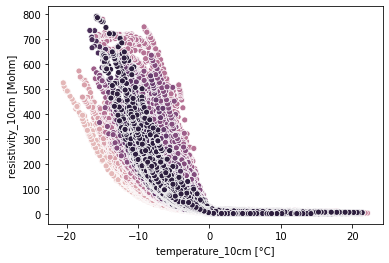

In [279]:
#plt.scatter(df_MH10['temperature_10cm [°C]'], df_MH10['resistivity_10cm [Mohm]'], c = 'Year')
sns.scatterplot(x='temperature_10cm [°C]', y='resistivity_10cm [Mohm]', data=df_MH10, hue='Year')
#plt.plot(df_MH10['temperature_85cm [°C]'], df_MH10['resistivity_85cm [Mohm]'],'.', alpha=0.3, )
#plt.legend
#df_MH10 = df_MH10.loc[:, 1:359]
#df_MH10.tail()
#DataFrame	df.loc[row_indexer,column_indexer]

<function matplotlib.pyplot.legend(*args, **kwargs)>

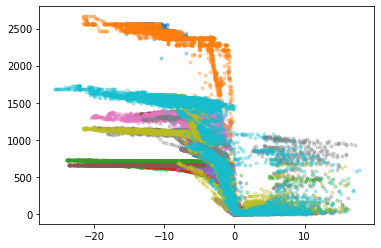

In [193]:
plt.plot(df_MH11['temperature_10cm [°C]'], df_MH11['resistivity_10cm [Mohm]'], '.', alpha=0.3)
#plt.plot(df_MH11['temperature_85cm [°C]'], df_MH11['resistivity_85cm [Mohm]'],'.', alpha=0.3)
plt.legend